# GRIP- The Sparks Foundation.
## Data Science and Business Analytics Internship.
### Task 2 : Prediction using Unsupervised ML
### Dataset : Iris.csv
-----------------------------------------------------------------------------------------

# Task : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## By : Isha Patel

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Loading the iris dataset

In [2]:
iris_data = pd.read_csv('iris.csv')

In [3]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#  Exploring the Dataset

In [4]:
#  representing the dimensionality of the DataFrame.
iris_data.shape

(150, 6)

In [5]:
# cheacking for null values
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Visualization for Species using box plot graph and pairplot

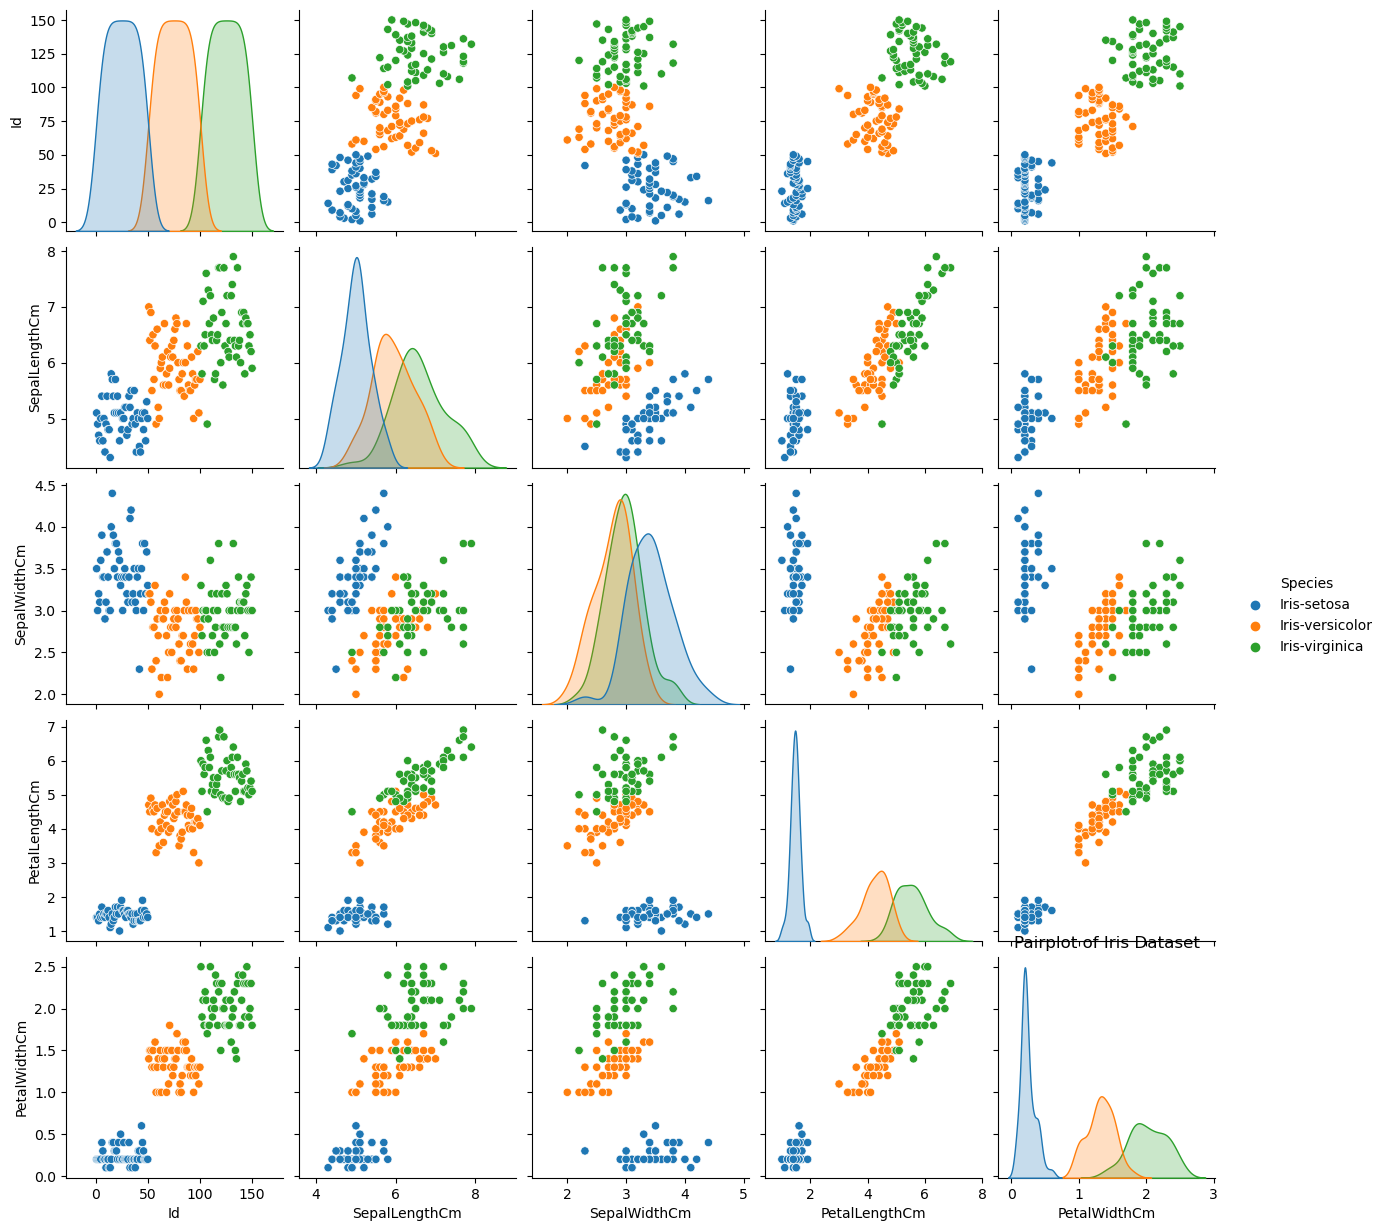

In [8]:
# Pairplot to visualize relationships between variables
sns.pairplot(iris_data, hue='Species')
plt.title('Pairplot of Iris Dataset')
plt.show()

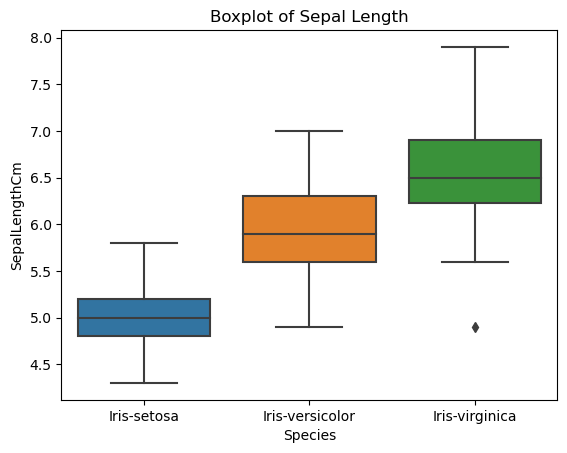

In [9]:
# Boxplot to visualize the distribution of features
sns.boxplot(x='Species', y='SepalLengthCm', data=iris_data)
plt.title('Boxplot of Sepal Length')
plt.show()

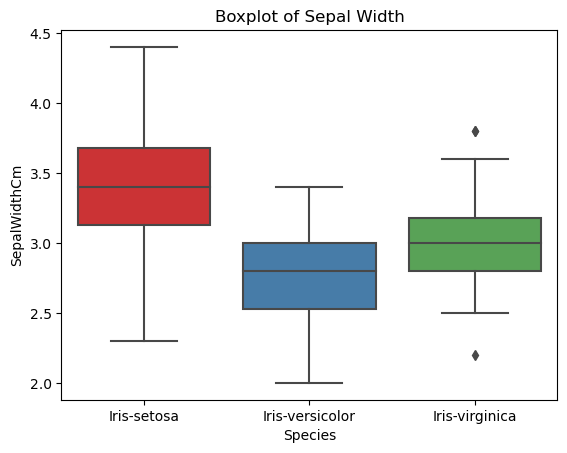

In [10]:
# Boxplot to visualize the distribution of features
sns.boxplot(x='Species', y='SepalWidthCm',data=iris_data, palette='Set1')
plt.title('Boxplot of Sepal Width')
plt.show()

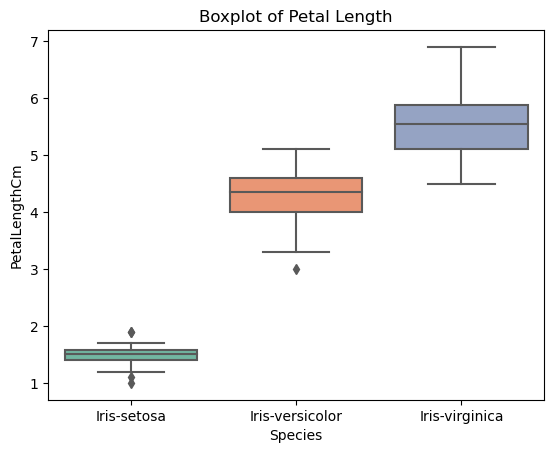

In [11]:
# Boxplot to visualize the distribution of features
sns.boxplot(x='Species', y='PetalLengthCm', data=iris_data, palette='Set2')
plt.title('Boxplot of Petal Length')
plt.show()

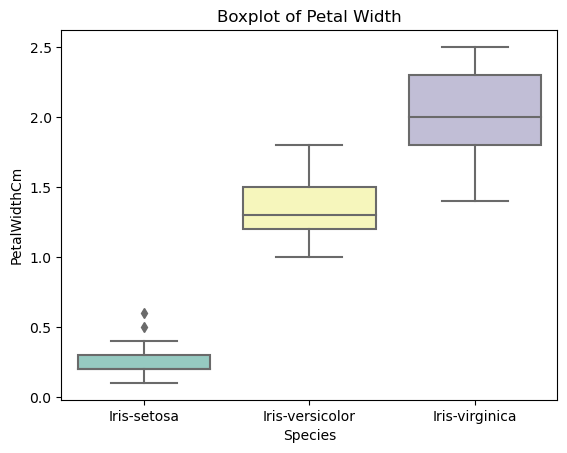

In [12]:
# Boxplot to visualize the distribution of features
sns.boxplot(x='Species', y='PetalWidthCm', data=iris_data, palette='Set3')
plt.title('Boxplot of Petal Width')
plt.show()

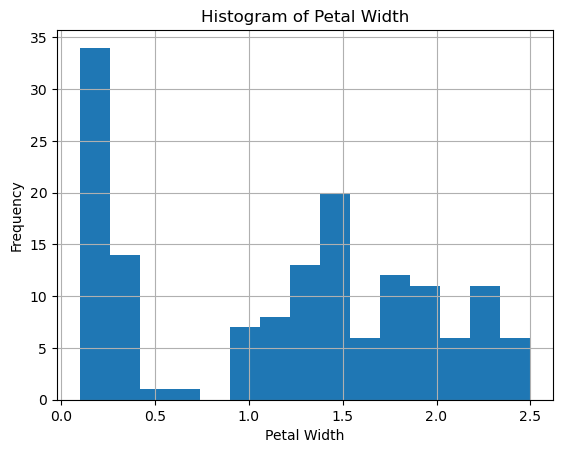

In [13]:
# Histogram to visualize the distribution of features
plt.hist(iris_data['PetalWidthCm'], bins=15)
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.grid(True)  # Add grid
plt.show()

In [14]:
# Calculate correlation matrix
correlation_matrix = iris_data.corr()

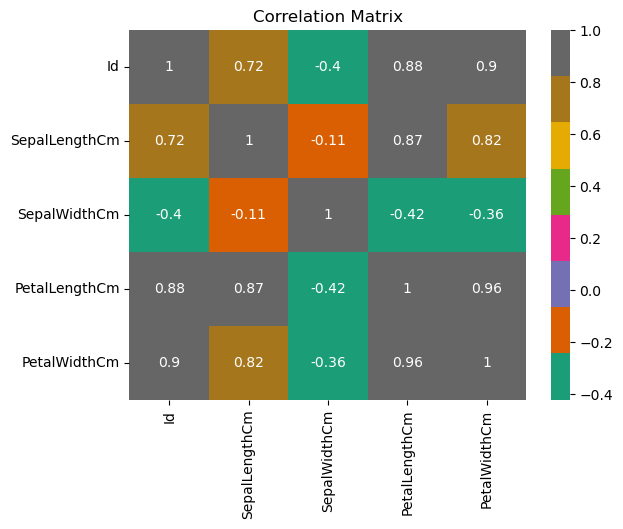

In [15]:
# Plot correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Dark2')
plt.title('Correlation Matrix')
plt.show()

# Find The Number of Clusters using K-means Clusters

In [16]:
# Select the features for clustering
X = iris_data.iloc[:, :-1].values

In [17]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('Kmeans:',i ,"wcss:",kmeans.inertia_)

Kmeans: 1 wcss: 281918.32440000004
Kmeans: 2 wcss: 70616.29893333332
Kmeans: 3 wcss: 31326.886799999997
Kmeans: 4 wcss: 17798.008728070177
Kmeans: 5 wcss: 11440.794903225808
Kmeans: 6 wcss: 7913.140425641026
Kmeans: 7 wcss: 5905.830285337851
Kmeans: 8 wcss: 4573.222868421052
Kmeans: 9 wcss: 3587.220904411765
Kmeans: 10 wcss: 2971.336674612152


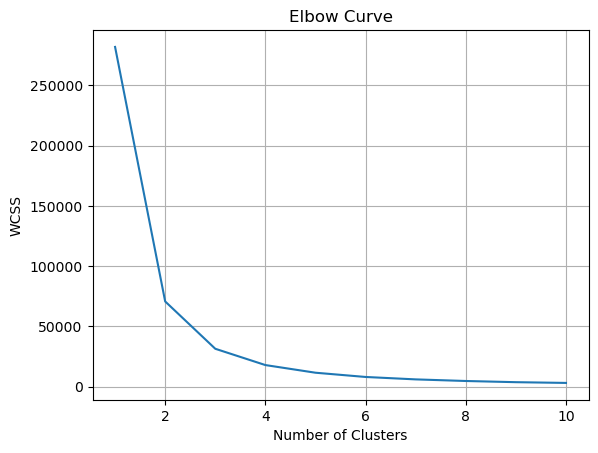

In [18]:
# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.grid(True)  # Add grid
plt.show()

 > From the above plot, A clear elbow is seen to be formed at 3. Thus, the optimum number of clusters is 3.

# Training The Model

In [19]:
# Applying K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters= 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state= 10)
y_kmeans = kmeans.fit_predict(X)

In [20]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Cluster Visualization

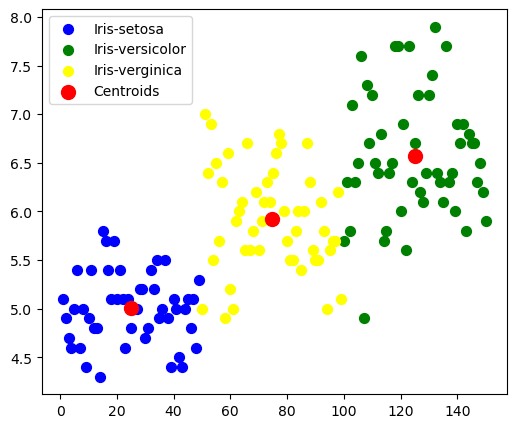

In [21]:
plt.figure(figsize = (6,5))
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1] , s = 50,c = 'blue',label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1] , s = 50,c = 'green',label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1] , s = 50,c = 'yellow',label = 'Iris-verginica')
#Centroid Plotting of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'red',label = 'Centroids')
plt.legend()
plt.show()

> the optimum number of clusters are 3.